In [1]:
# source("https://bioconductor.org/biocLite.R")
# biocLite("DESeq2")
#install.packages("calibrate")
library(DESeq2)
library(gplots)
library(RColorBrewer)
library(calibrate)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching package: ‘S4Vectors’

The followin

In [2]:
countdata = read.csv('../results/CvsAci.combined.csv', header=TRUE, row.names=1)
countdata = as.matrix(countdata)
head(countdata)

,control1,control2,control3,Aci1,Aci2,Aci3,control4,control5,control6,Aci4,Aci5,Aci6
WBGene00000001,1750,1853,3032,1562,934,5970,580,543,503,592,587,563
WBGene00000002,63,97,180,79,68,196,16,19,15,20,22,19
WBGene00000003,85,104,130,118,64,360,42,34,23,26,33,19
WBGene00000004,246,276,327,236,120,747,104,82,43,90,88,96
WBGene00000005,169,159,377,174,88,568,56,60,28,54,57,83
WBGene00000006,54,52,86,28,32,175,14,8,9,19,11,9


In [3]:
(condition = factor(c(rep("control",3), rep("Aci",3), rep("control",3), rep("Aci",3))))

[1] control control control Aci     Aci     Aci     control control control
[10] Aci     Aci     Aci    
Levels: Aci control

In [19]:
(coldata = data.frame(row.names=colnames(countdata), condition))
(coldata$batch = factor(c(rep('A', 6), rep('B', 6))))
coldata

,condition
,<fct>
control1,control
control2,control
control3,control
Aci1,Aci
Aci2,Aci
Aci3,Aci
control4,control
control5,control
control6,control


[1] A A A A A A B B B B B B
Levels: A B

,condition,batch
,<fct>,<fct>
control1,control,A
control2,control,A
control3,control,A
Aci1,Aci,A
Aci2,Aci,A
Aci3,Aci,A
control4,control,B
control5,control,B
control6,control,B


In [20]:
dds = DESeqDataSetFromMatrix(countData=countdata, colData=coldata, design=~batch+condition)
dds

  it appears that the last variable in the design formula, 'condition',
  has a factor level, 'control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').


class: DESeqDataSet 
dim: 46748 12 
metadata(1): version
assays(1): counts
rownames(46748): WBGene00000001 WBGene00000002 ... WBGene00255587
  WBGene00255588
rowData names(0):
colnames(12): control1 control2 ... Aci5 Aci6
colData names(2): condition batch

In [21]:
(dds$condition = relevel(dds$condition, ref="control"))

[1] control control control Aci     Aci     Aci     control control control
[10] Aci     Aci     Aci    
Levels: control Aci

In [22]:
dds = DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [24]:
resultsNames(dds)

[1] "Intercept"                "batch_B_vs_A"            
[3] "condition_Aci_vs_control"

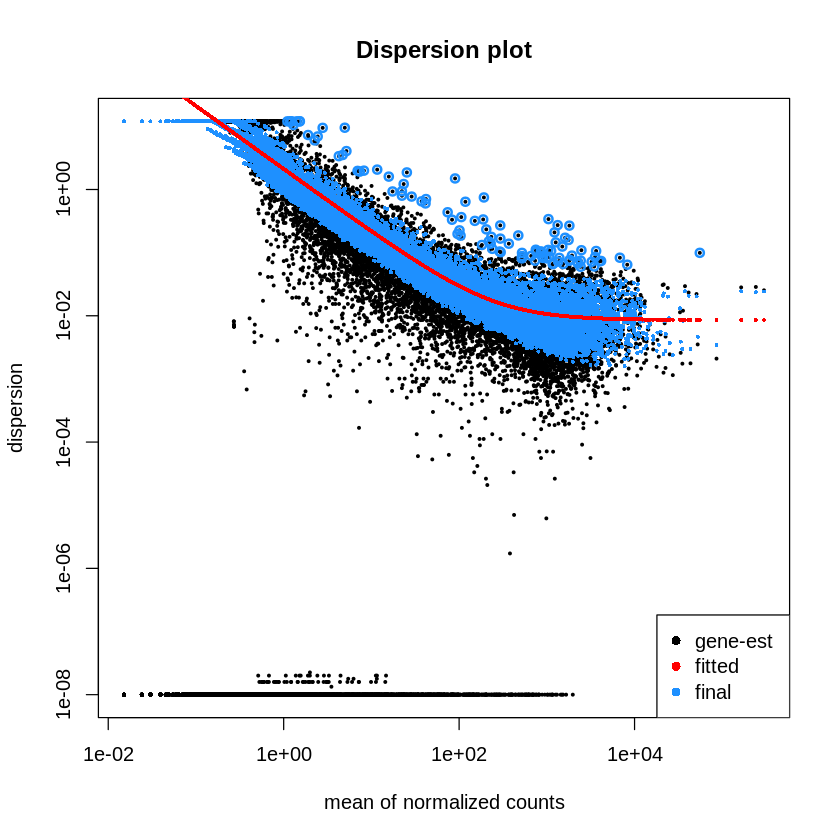

In [25]:
plotDispEsts(dds, main="Dispersion plot")

In [26]:
rld = rlogTransformation(dds)

In [27]:
head(assay(rld))

,control1,control2,control3,Aci1,Aci2,Aci3,control4,control5,control6,Aci4,Aci5,Aci6
WBGene00000001,10.004137,10.080238,9.874638,10.097572,10.118658,10.076972,9.999987,10.102474,10.215784,10.075706,10.094101,10.060725
WBGene00000002,5.377212,5.604731,5.562911,5.592913,5.800209,5.359589,5.308784,5.425050,5.414326,5.400765,5.445960,5.395814
WBGene00000003,5.779236,5.902087,5.637888,6.093472,6.034338,5.946381,5.987514,5.963330,5.869511,5.787088,5.906556,5.684599
WBGene00000004,7.177817,7.284047,6.877188,7.308686,7.199830,7.142740,7.354371,7.303393,7.014582,7.289354,7.292762,7.362469
WBGene00000005,6.668223,6.640562,6.753473,6.837724,6.732902,6.708627,6.672406,6.823159,6.512631,6.686141,6.736064,6.995340
WBGene00000006,4.777346,4.770249,4.693879,4.622561,4.854382,4.793738,4.689644,4.607399,4.675415,4.800521,4.652272,4.611488


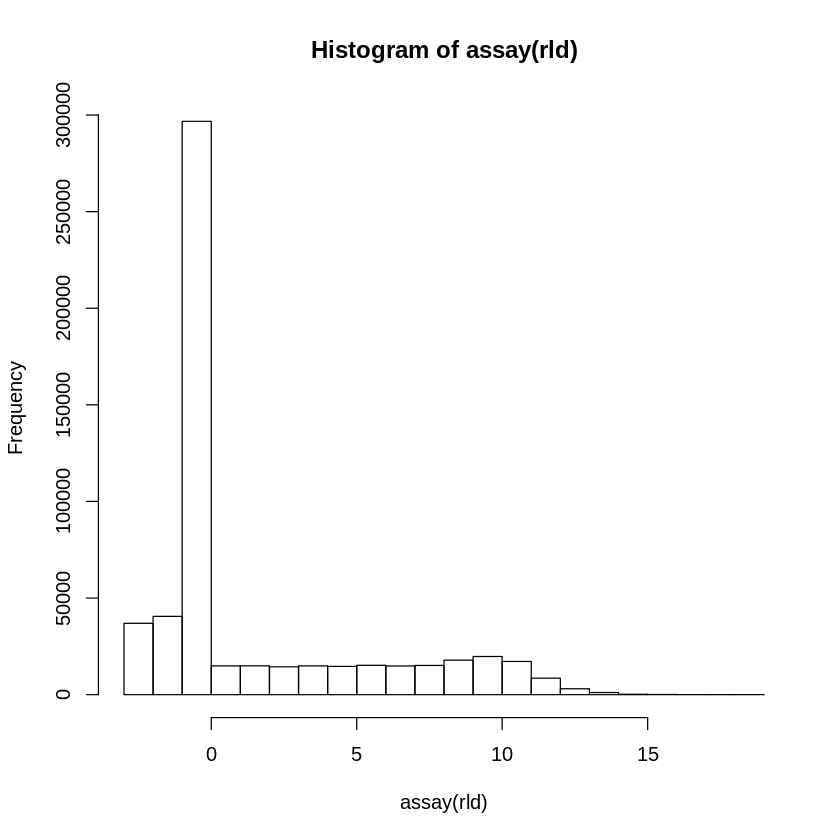

In [28]:
hist(assay(rld))

In [29]:
(mycols = brewer.pal(8, "Dark2")[1:length(unique(condition))])

[1] "#1B9E77" "#D95F02"

In [30]:
sampleDists = as.matrix(dist(t(assay(rld))))

Warning message in plot.window(...):
“"key" is not a graphical parameter”Warning message in plot.window(...):
“"trace" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"key" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"trace" is not a graphical parameter”Warning message in title(...):
“"key" is not a graphical parameter”Warning message in title(...):
“"trace" is not a graphical parameter”

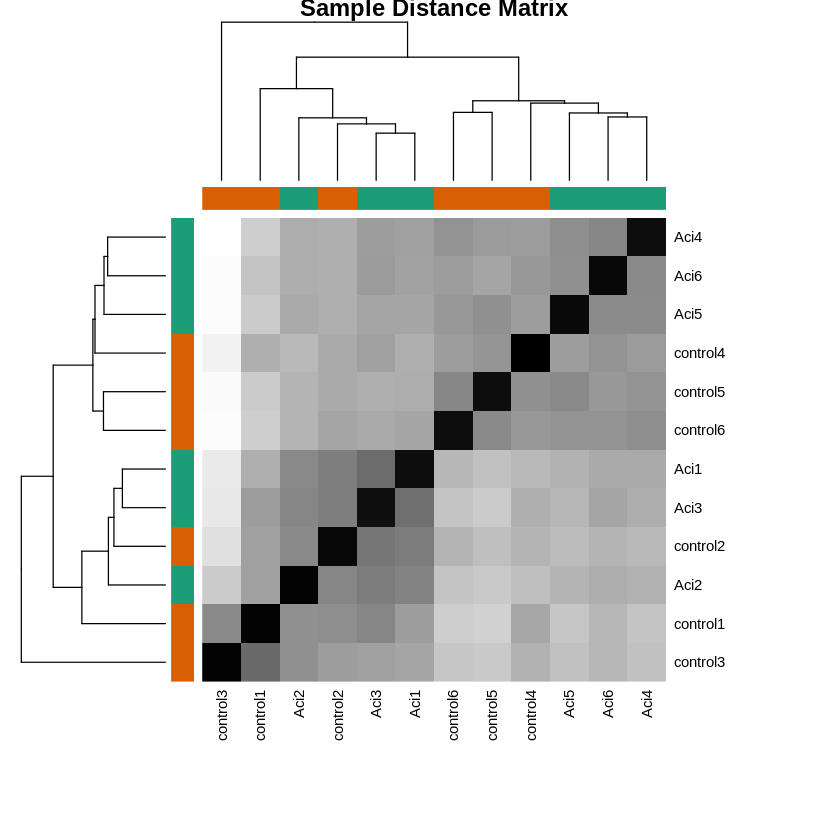

In [31]:
heatmap(as.matrix(sampleDists), key=F, trace="none",
       col=colorpanel(100, "black", "white"),
       ColSideColors=mycols[condition], RowSideColor=mycols[condition],
       margin=c(10,10), main="Sample Distance Matrix")

In [32]:
rld_pca <- function (rld, intgroup = "condition", ntop = 500, colors=NULL, legendpos="bottomleft", main="PCA Biplot", textcx=1, ...) {
  require(genefilter)
  require(calibrate)
  require(RColorBrewer)
  rv = rowVars(assay(rld))
  select = order(rv, decreasing = TRUE)[seq_len(min(ntop, length(rv)))]
  pca = prcomp(t(assay(rld)[select, ]))
  fac = factor(apply(as.data.frame(colData(rld)[, intgroup, drop = FALSE]), 1, paste, collapse = " : "))
  if (is.null(colors)) {
    if (nlevels(fac) >= 3) {
      colors = brewer.pal(nlevels(fac), "Paired")
    }   else {
      colors = c("black", "red")
    }
  }
  pc1var <- round(summary(pca)$importance[2,1]*100, digits=1)
  pc2var <- round(summary(pca)$importance[2,2]*100, digits=1)
  pc1lab <- paste0("PC1 (",as.character(pc1var),"%)")
  pc2lab <- paste0("PC2 (",as.character(pc2var),"%)")
  plot(PC2~PC1, data=as.data.frame(pca$x), bg=colors[fac], pch=21, xlab=pc1lab, ylab=pc2lab, main=main, ...)
  with(as.data.frame(pca$x), textxy(PC1, PC2, labs=rownames(as.data.frame(pca$x)), cex=textcx))
  legend(legendpos, legend=levels(fac), col=colors, pch=20)
  #     rldyplot(PC2 ~ PC1, groups = fac, data = as.data.frame(pca$rld),
  #            pch = 16, cerld = 2, aspect = "iso", col = colours, main = draw.key(key = list(rect = list(col = colours),
  #                                                                                         terldt = list(levels(fac)), rep = FALSE)))
}

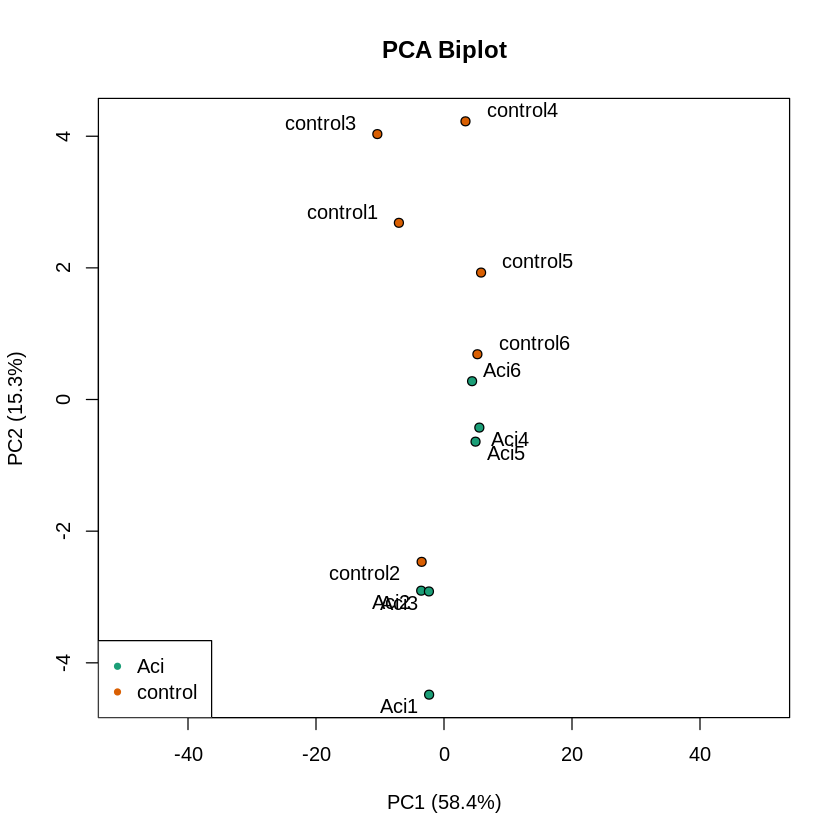

In [33]:
rld_pca(rld, colors=mycols, intgroup="condition", xlim=c(-50,50))

In [34]:
res = results(dds, name="condition_Aci_vs_control")

In [35]:
table(res$padj<0.05)


FALSE  TRUE 
12948   220 

In [36]:
res = res[order(res$padj),]
resdata = merge(as.data.frame(res), as.data.frame(counts(dds, normalized=TRUE)), by="row.names", sort=FALSE)
names(resdata)[1] = "Gene"
head(resdata)

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,control1,control2,control3,Aci1,Aci2,Aci3,control4,control5,control6,Aci4,Aci5,Aci6
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WBGene00008390,483.3780,1.262702,0.10291096,12.269854,1.314898e-34,1.731458e-30,255.8258,276.3733,285.6102,573.8808,645.4496,541.6328,310.48944,266.46773,278.64618,927.0711,742.4402,696.6492
WBGene00010470,552.9713,1.514725,0.14699601,10.304530,6.721935e-25,4.425722e-21,316.1892,313.9272,332.6793,665.2766,822.2519,649.2696,188.01861,243.92046,306.01321,822.8442,945.4365,1029.8293
WBGene00008296,398.5722,1.590144,0.18858585,8.431936,3.399927e-17,1.492341e-13,220.1827,220.6292,228.9531,531.3711,609.1203,417.6599,87.97201,219.32344,204.00881,572.3339,736.8014,734.5106
WBGene00009221,513.0623,-0.795737,0.09728128,-8.179755,2.844218e-16,9.363167e-13,554.7683,707.6566,577.9031,334.4095,290.6340,337.4314,636.50336,707.16435,701.59127,495.5351,385.3171,427.8335
WBGene00019967,176.3630,1.348961,0.16889476,7.986991,1.382721e-15,3.641534e-12,117.8523,139.0668,127.2607,244.4307,230.0852,249.3980,51.74824,84.03982,72.14946,277.9385,278.1801,244.2058
WBGene00000715,246.9672,1.286973,0.16541647,7.780197,7.241159e-15,1.589193e-11,120.1519,197.7448,150.2141,247.9732,440.7948,343.2398,112.12119,149.63188,126.88353,424.2219,345.8456,304.7840


In [37]:
write.csv(resdata, file="../results/C_vs_Aci.deseq.combined.batch.csv")

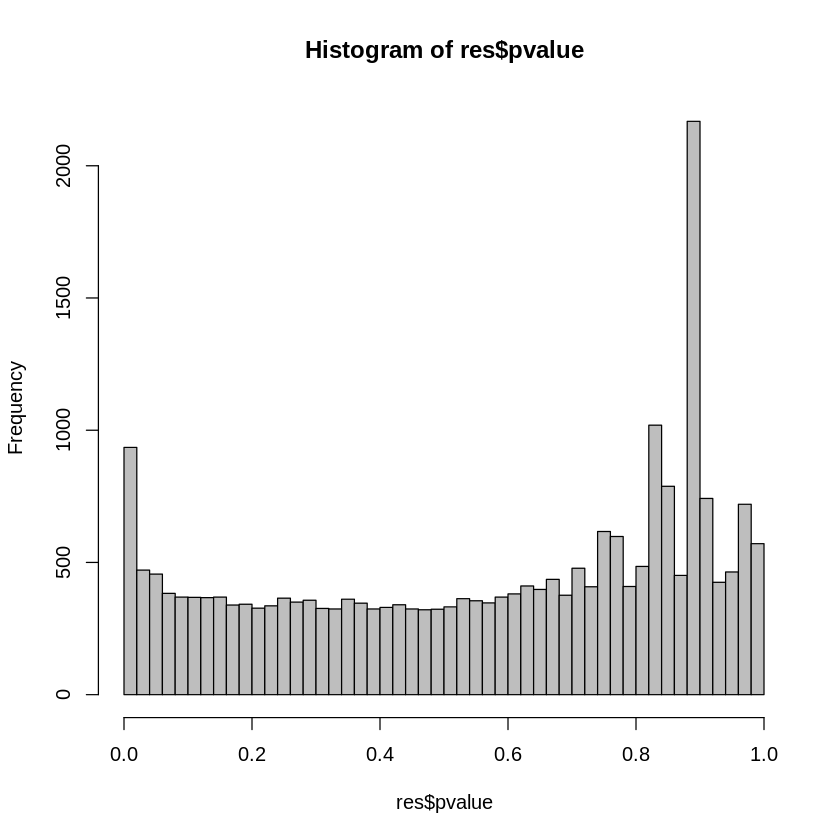

In [38]:
hist(res$pvalue, breaks=50, col="grey")

In [39]:
maplot <- function (res, thresh=0.05, labelsig=TRUE, textcx=1, ...) {
  with(res, plot(baseMean, log2FoldChange, pch=20, cex=.5, log="x", ...))
  with(subset(res, padj<thresh), points(baseMean, log2FoldChange, col="red", pch=20, cex=1.5))
  if (labelsig) {
    require(calibrate)
    with(subset(res, padj<thresh), textxy(baseMean, log2FoldChange, labs=Gene, cex=textcx, col=2))
  }
}

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“23177 x values <= 0 omitted from logarithmic plot”

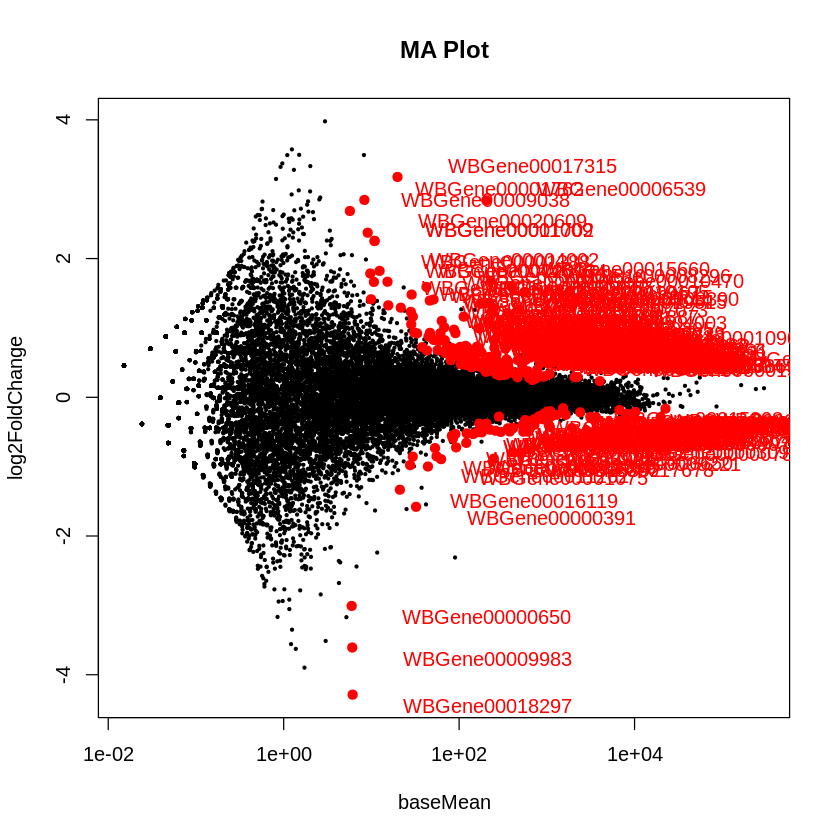

In [40]:
maplot(resdata, main="MA Plot")

In [41]:
volcanoplot <- function (res, lfcthresh=2, sigthresh=0.05, main="Volcano Plot", legendpos="bottomright", labelsig=TRUE, textcx=1, ...) {
  with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main=main, ...))
  with(subset(res, padj<sigthresh ), points(log2FoldChange, -log10(pvalue), pch=20, col="red", ...))
  with(subset(res, abs(log2FoldChange)>lfcthresh), points(log2FoldChange, -log10(pvalue), pch=20, col="orange", ...))
  with(subset(res, padj<sigthresh & abs(log2FoldChange)>lfcthresh), points(log2FoldChange, -log10(pvalue), pch=20, col="green", ...))
  if (labelsig) {
    require(calibrate)
    with(subset(res, padj<sigthresh & abs(log2FoldChange)>lfcthresh), textxy(log2FoldChange, -log10(pvalue), labs=Gene, cex=textcx, ...))
  }
  legend(legendpos, xjust=1, yjust=1, legend=c(paste("FDR<",sigthresh,sep=""), paste("|LogFC|>",lfcthresh,sep=""), "both"), pch=20, col=c("red","orange","green"))
}

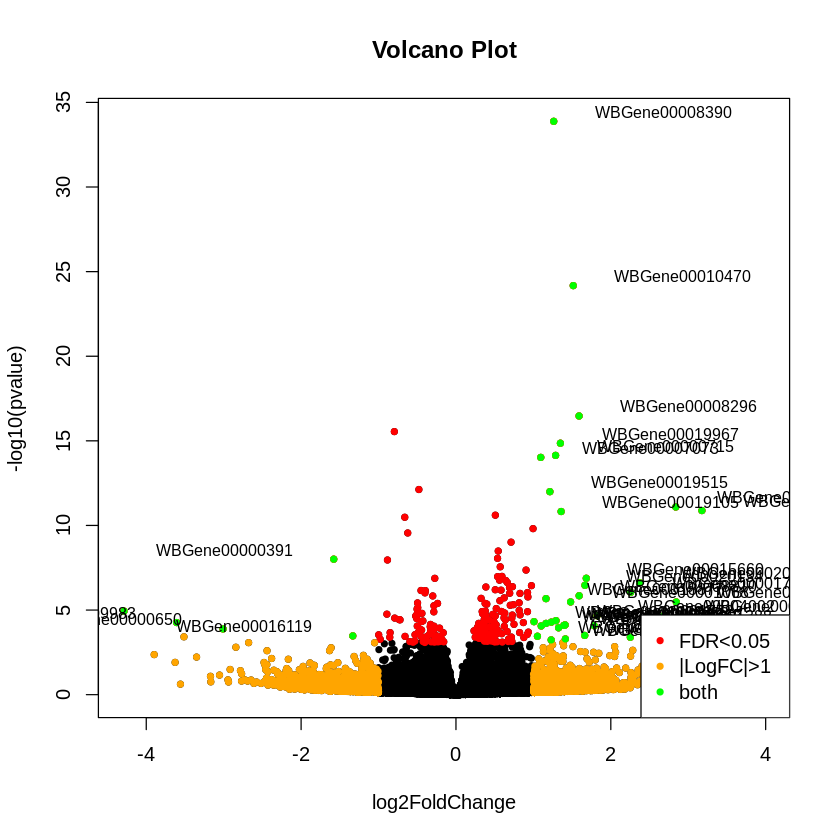

In [42]:
volcanoplot(resdata, lfcthresh=1, sigthresh=0.05, textcx=.8)

## Remove `control2` sample

In [49]:
countdata = countdata[, -c(2)]
coldata = coldata[-c(2),]
countdata

,control1,control3,Aci1,Aci2,Aci3,control4,control5,control6,Aci4,Aci5,Aci6
WBGene00000001,1750,3032,1562,934,5970,580,543,503,592,587,563
WBGene00000002,63,180,79,68,196,16,19,15,20,22,19
WBGene00000003,85,130,118,64,360,42,34,23,26,33,19
WBGene00000004,246,327,236,120,747,104,82,43,90,88,96
WBGene00000005,169,377,174,88,568,56,60,28,54,57,83
WBGene00000006,54,86,28,32,175,14,8,9,19,11,9
WBGene00000007,146,327,150,75,472,48,30,44,33,53,51
WBGene00000008,30,21,16,4,46,1,6,3,1,5,5
WBGene00000009,12,32,3,1,48,4,0,0,3,7,2
WBGene00000010,1082,1656,887,464,3710,340,247,177,300,281,269


In [50]:
coldata

,condition,batch
,<fct>,<fct>
control1,control,A
control3,control,A
Aci1,Aci,A
Aci2,Aci,A
Aci3,Aci,A
control4,control,B
control5,control,B
control6,control,B
Aci4,Aci,B


In [51]:
dds = DESeqDataSetFromMatrix(countData=countdata, colData=coldata, design=~batch+condition)
dds

  it appears that the last variable in the design formula, 'condition',
  has a factor level, 'control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').


class: DESeqDataSet 
dim: 46748 11 
metadata(1): version
assays(1): counts
rownames(46748): WBGene00000001 WBGene00000002 ... WBGene00255587
  WBGene00255588
rowData names(0):
colnames(11): control1 control3 ... Aci5 Aci6
colData names(2): condition batch

In [52]:
(dds$condition = relevel(dds$condition, ref="control"))

[1] control control Aci     Aci     Aci     control control control Aci    
[10] Aci     Aci    
Levels: control Aci

In [53]:
dds = DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [54]:
resultsNames(dds)

[1] "Intercept"                "batch_B_vs_A"            
[3] "condition_Aci_vs_control"

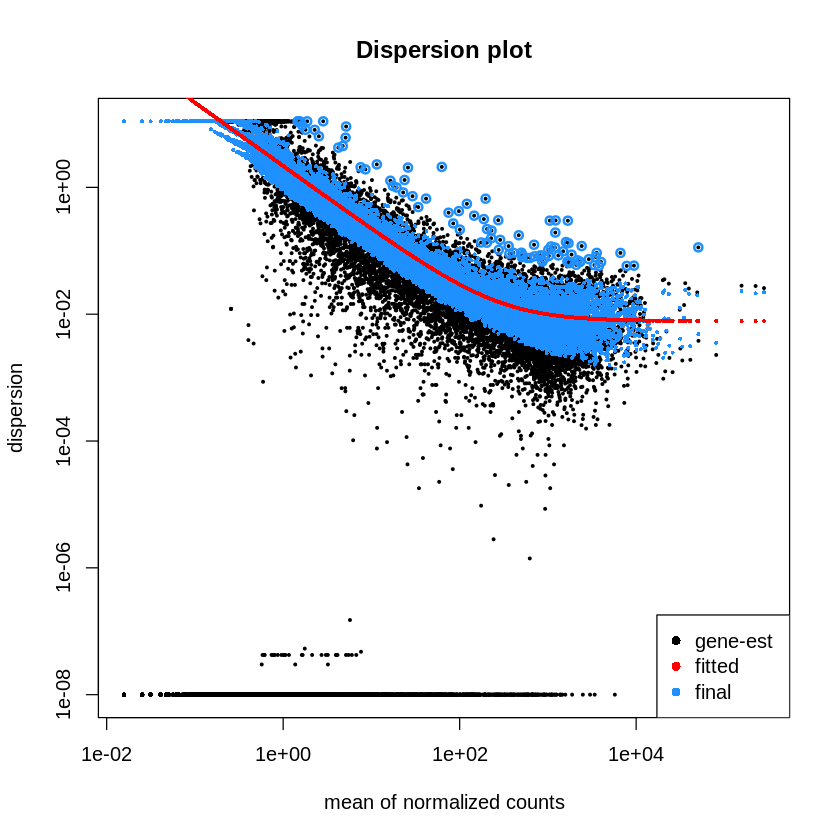

In [55]:
plotDispEsts(dds, main="Dispersion plot")

In [56]:
rld = rlogTransformation(dds)

In [57]:
head(assay(rld))

,control1,control3,Aci1,Aci2,Aci3,control4,control5,control6,Aci4,Aci5,Aci6
WBGene00000001,9.934766,9.808541,10.027094,10.048519,10.006647,9.930738,10.032509,10.144958,10.006565,10.024688,9.991218
WBGene00000002,5.283379,5.467676,5.495113,5.699873,5.267513,5.211985,5.327007,5.315497,5.303511,5.348327,5.298266
WBGene00000003,5.708759,5.571662,6.018091,5.960408,5.872971,5.914318,5.890414,5.797077,5.715750,5.834296,5.613593
WBGene00000004,7.103639,6.808964,7.232698,7.125126,7.069002,7.278302,7.227658,6.939946,7.214232,7.217497,7.286474
WBGene00000005,6.609028,6.694456,6.776128,6.673475,6.648215,6.614000,6.763640,6.455534,6.628076,6.677498,6.934137
WBGene00000006,4.687932,4.607451,4.535771,4.763641,4.704024,4.600469,4.518318,4.585542,4.710565,4.563315,4.522672


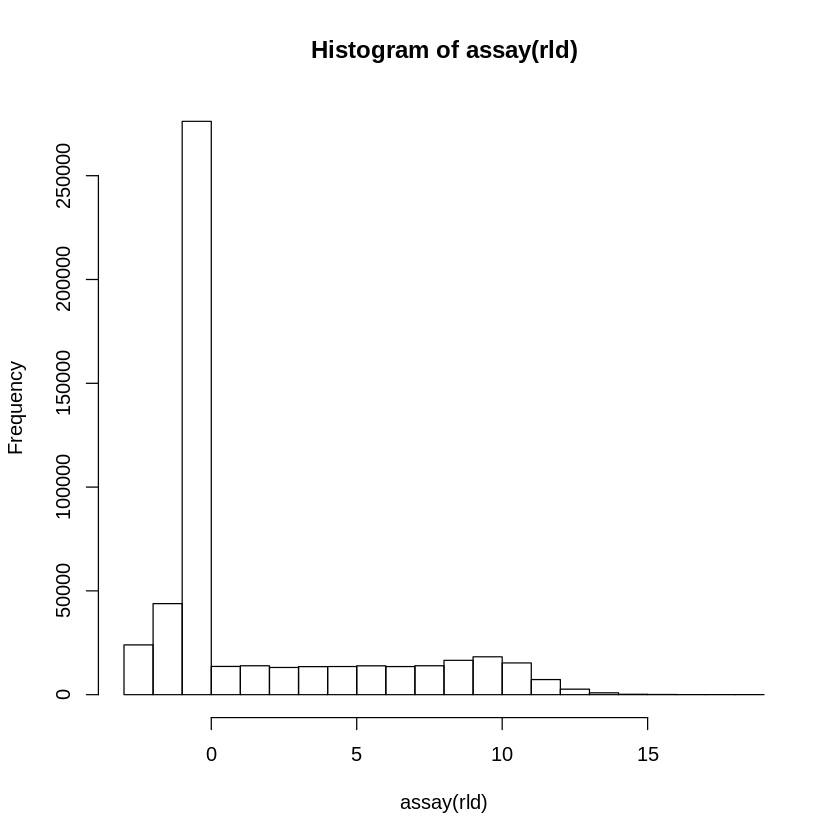

In [58]:
hist(assay(rld))

In [59]:
(mycols = brewer.pal(8, "Dark2")[1:length(unique(condition))])

[1] "#1B9E77" "#D95F02"

In [60]:
sampleDists = as.matrix(dist(t(assay(rld))))

[1] control control Aci     Aci     Aci     control control control Aci    
[10] Aci     Aci    
Levels: Aci control

Warning message in plot.window(...):
“"key" is not a graphical parameter”Warning message in plot.window(...):
“"trace" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"key" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"trace" is not a graphical parameter”Warning message in title(...):
“"key" is not a graphical parameter”Warning message in title(...):
“"trace" is not a graphical parameter”

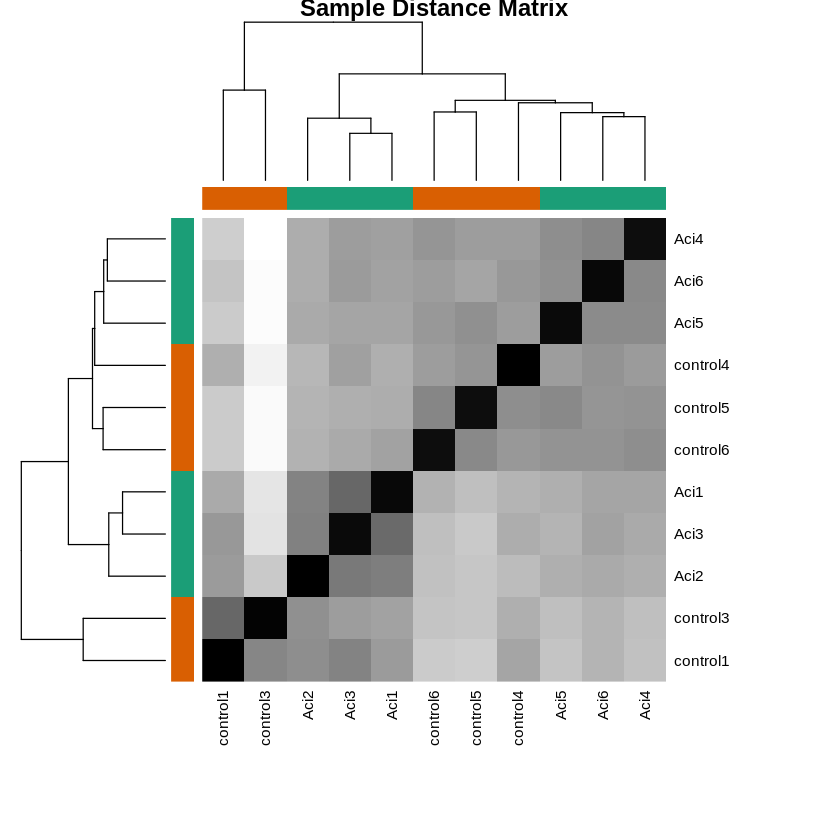

In [62]:
(condition = factor(c(rep("control",2), rep("Aci",3), rep("control",3), rep("Aci",3))))
heatmap(as.matrix(sampleDists), key=F, trace="none",
       col=colorpanel(100, "black", "white"),
       ColSideColors=mycols[condition], RowSideColor=mycols[condition],
       margin=c(10,10), main="Sample Distance Matrix")

In [63]:
rld_pca <- function (rld, intgroup = "condition", ntop = 500, colors=NULL, legendpos="bottomleft", main="PCA Biplot", textcx=1, ...) {
  require(genefilter)
  require(calibrate)
  require(RColorBrewer)
  rv = rowVars(assay(rld))
  select = order(rv, decreasing = TRUE)[seq_len(min(ntop, length(rv)))]
  pca = prcomp(t(assay(rld)[select, ]))
  fac = factor(apply(as.data.frame(colData(rld)[, intgroup, drop = FALSE]), 1, paste, collapse = " : "))
  if (is.null(colors)) {
    if (nlevels(fac) >= 3) {
      colors = brewer.pal(nlevels(fac), "Paired")
    }   else {
      colors = c("black", "red")
    }
  }
  pc1var <- round(summary(pca)$importance[2,1]*100, digits=1)
  pc2var <- round(summary(pca)$importance[2,2]*100, digits=1)
  pc1lab <- paste0("PC1 (",as.character(pc1var),"%)")
  pc2lab <- paste0("PC2 (",as.character(pc2var),"%)")
  plot(PC2~PC1, data=as.data.frame(pca$x), bg=colors[fac], pch=21, xlab=pc1lab, ylab=pc2lab, main=main, ...)
  with(as.data.frame(pca$x), textxy(PC1, PC2, labs=rownames(as.data.frame(pca$x)), cex=textcx))
  legend(legendpos, legend=levels(fac), col=colors, pch=20)
  #     rldyplot(PC2 ~ PC1, groups = fac, data = as.data.frame(pca$rld),
  #            pch = 16, cerld = 2, aspect = "iso", col = colours, main = draw.key(key = list(rect = list(col = colours),
  #                                                                                         terldt = list(levels(fac)), rep = FALSE)))
}

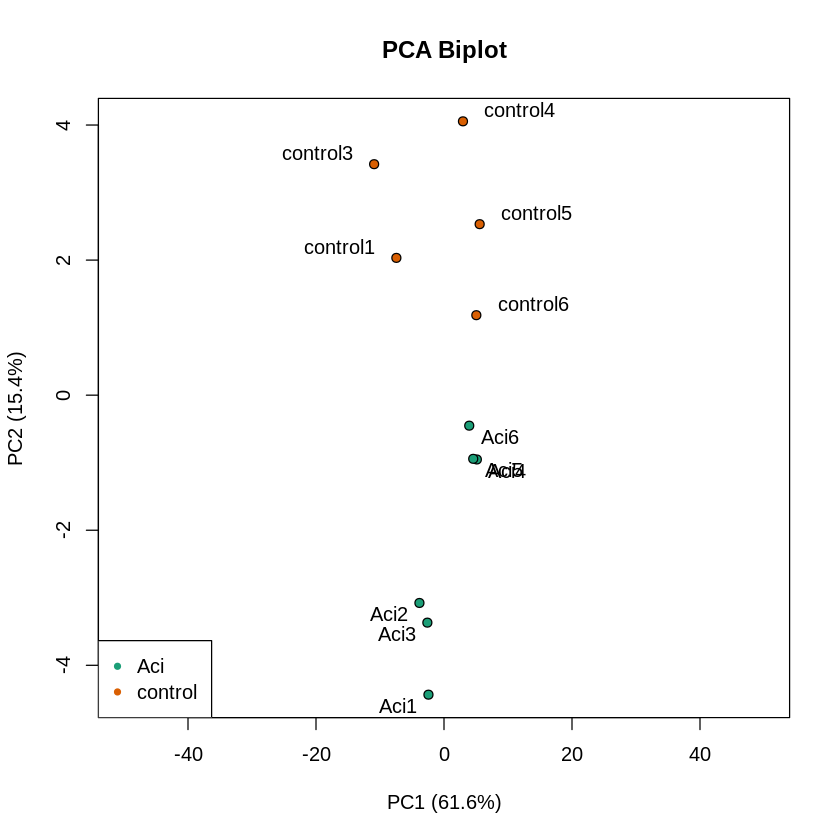

In [64]:
rld_pca(rld, colors=mycols, intgroup="condition", xlim=c(-50,50))

In [65]:
res = results(dds, name="condition_Aci_vs_control")

In [66]:
table(res$padj<0.05)


FALSE  TRUE 
10002   419 

In [67]:
res = res[order(res$padj),]
resdata = merge(as.data.frame(res), as.data.frame(counts(dds, normalized=TRUE)), by="row.names", sort=FALSE)
names(resdata)[1] = "Gene"
head(resdata)

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,control1,control3,Aci1,Aci2,Aci3,control4,control5,control6,Aci4,Aci5,Aci6
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WBGene00008390,478.7611,1.2863064,0.11118485,11.569080,5.911332e-31,6.160199e-27,243.8032,272.8089,546.6975,615.1849,515.9747,295.94502,253.98726,265.56096,884.2392,708.0315,664.1388
WBGene00010470,547.8763,1.5458540,0.15828672,9.766164,1.572956e-22,8.195888e-19,301.3298,317.7683,633.7641,783.6970,618.5125,179.21115,232.49603,291.64284,784.8277,901.6198,981.7703
WBGene00000715,239.7035,1.4020670,0.16064357,8.727813,2.596439e-18,9.019164e-15,114.5053,143.4814,236.2273,420.1262,326.9799,106.86903,142.62362,120.92508,404.6223,329.8172,290.5607
WBGene00009221,472.2785,-0.7275455,0.08588407,-8.471250,2.427727e-17,6.324835e-14,528.6969,552.0009,318.5694,277.0063,321.4467,606.68729,674.04312,668.64455,472.6407,367.4594,407.8678
WBGene00019967,171.3625,1.4272047,0.17565016,8.125269,4.463731e-16,9.303308e-13,112.3138,121.5568,232.8526,219.2967,237.5835,49.32417,80.10368,68.76132,265.0973,265.2877,232.8095
WBGene00008296,395.3882,1.6252947,0.20378127,7.975682,1.515413e-15,2.632020e-12,209.8351,218.6912,506.2014,580.5591,397.8746,83.85109,209.05105,194.42856,545.8913,702.6540,700.2333


In [68]:
write.csv(resdata, file="../results/C_vs_Aci.minus2.deseq.combined.batch.csv")

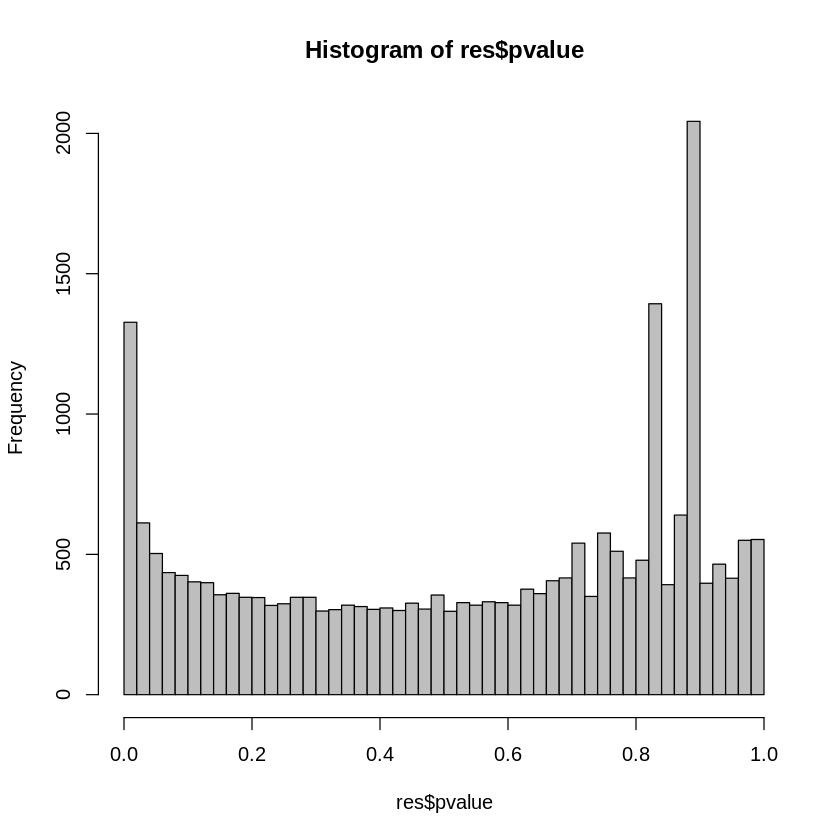

In [69]:
hist(res$pvalue, breaks=50, col="grey")

In [70]:
maplot <- function (res, thresh=0.05, labelsig=TRUE, textcx=1, ...) {
  with(res, plot(baseMean, log2FoldChange, pch=20, cex=.5, log="x", ...))
  with(subset(res, padj<thresh), points(baseMean, log2FoldChange, col="red", pch=20, cex=1.5))
  if (labelsig) {
    require(calibrate)
    with(subset(res, padj<thresh), textxy(baseMean, log2FoldChange, labs=Gene, cex=textcx, col=2))
  }
}

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“23562 x values <= 0 omitted from logarithmic plot”

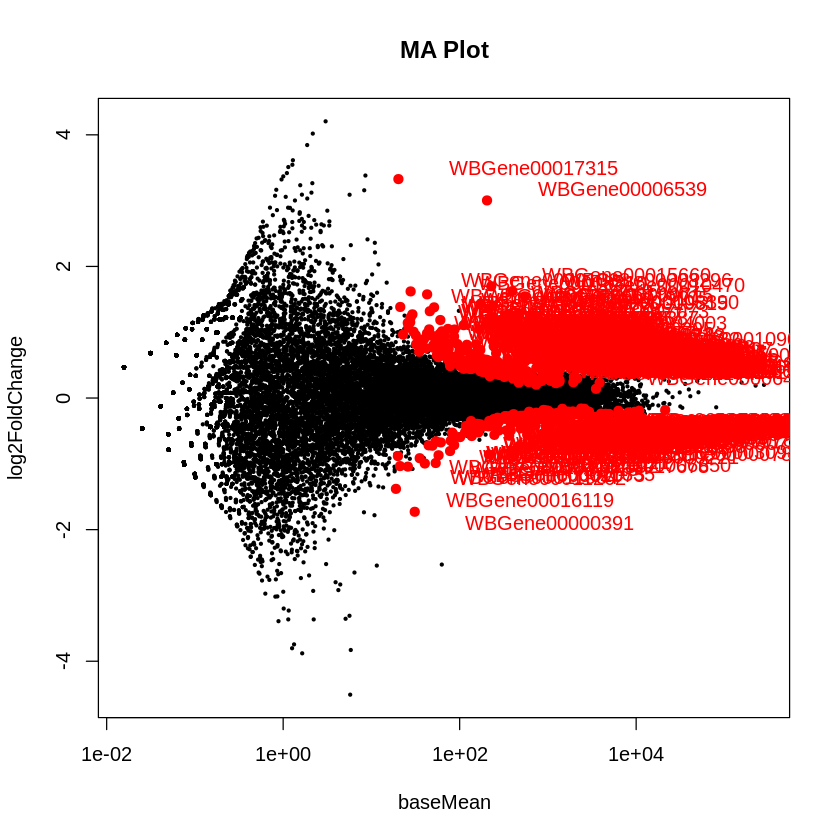

In [71]:
maplot(resdata, main="MA Plot")

In [72]:
volcanoplot <- function (res, lfcthresh=2, sigthresh=0.05, main="Volcano Plot", legendpos="bottomright", labelsig=TRUE, textcx=1, ...) {
  with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main=main, ...))
  with(subset(res, padj<sigthresh ), points(log2FoldChange, -log10(pvalue), pch=20, col="red", ...))
  with(subset(res, abs(log2FoldChange)>lfcthresh), points(log2FoldChange, -log10(pvalue), pch=20, col="orange", ...))
  with(subset(res, padj<sigthresh & abs(log2FoldChange)>lfcthresh), points(log2FoldChange, -log10(pvalue), pch=20, col="green", ...))
  if (labelsig) {
    require(calibrate)
    with(subset(res, padj<sigthresh & abs(log2FoldChange)>lfcthresh), textxy(log2FoldChange, -log10(pvalue), labs=Gene, cex=textcx, ...))
  }
  legend(legendpos, xjust=1, yjust=1, legend=c(paste("FDR<",sigthresh,sep=""), paste("|LogFC|>",lfcthresh,sep=""), "both"), pch=20, col=c("red","orange","green"))
}

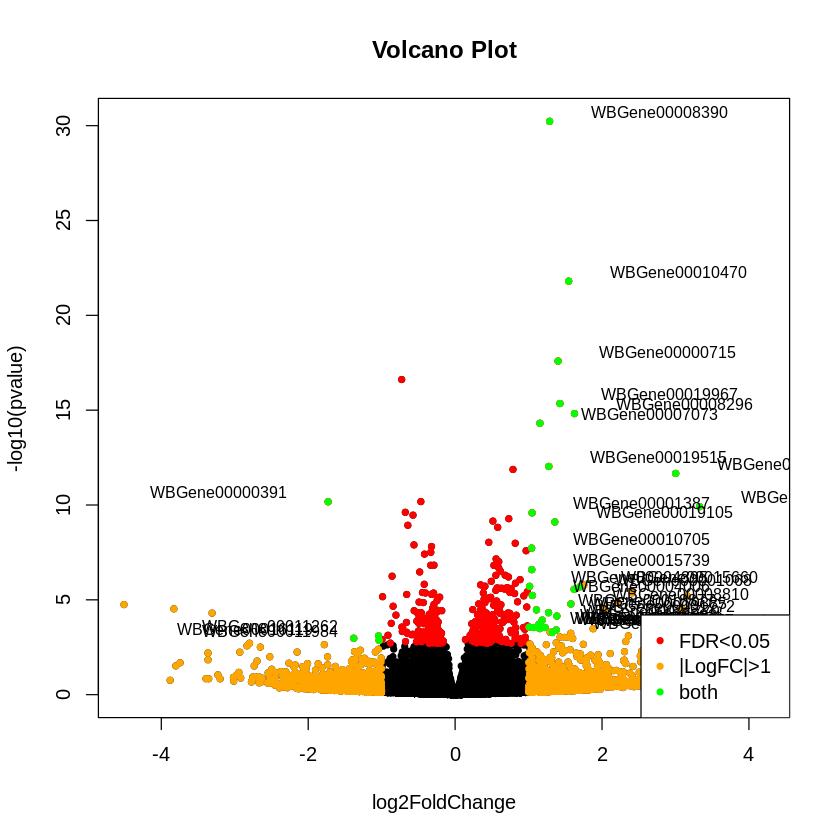

In [73]:
volcanoplot(resdata, lfcthresh=1, sigthresh=0.05, textcx=.8)